In [1]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
df_train= pd.read_csv('final_train.csv', index_col=0)
df_test = pd.read_csv('final_test.csv', index_col=0)
df_train_ohe = pd.read_csv('onehot_training.csv', index_col=0)
df_test_ohe = pd.read_csv('onehot_testing.csv', index_col=0)

FileNotFoundError: File b'final_train.csv' does not exist

In [196]:
df_train = df_train[['TEAM','GAME DATE','OPP','MIN', 'EFG%', 'FTA RATE', 'TOV%', 'OREB%', 'OPP_EFG%', 
                     'OPP_FTA RATE','OPP_TOV%', 'OPP_OREB%', 'REST', 'OPP_REST', 'Home/Away','W/L', '+/-']]

df_test = df_test[['TEAM','GAME DATE','OPP','MIN', 'EFG%', 'FTA RATE', 'TOV%', 'OREB%', 'OPP_EFG%', 
                   'OPP_FTA RATE', 'OPP_TOV%', 'OPP_OREB%', 'REST', 'OPP_REST','Home/Away', 'W/L', '+/-']]

In [164]:
scaler = StandardScaler()

# Support Vector Regression

In [166]:
X_train_svr = df_train.iloc[:,4:15]
y_train_svr = df_train.iloc[:,-1]
X_test_svr = df_test.iloc[:,4:15]
y_test_svr = df_test.iloc[:,-1]

In [165]:
df_train.head()

,TEAM,GAME DATE,OPP,MIN,EFG%,FTA RATE,TOV%,OREB%,OPP_EFG%,OPP_FTA RATE,OPP_TOV%,OPP_OREB%,REST,OPP_REST,Home/Away,W/L,+/-
0,POR,10/25/16,UTA,48,0.607,0.293,0.140,0.167,0.537,0.195,0.144,0.171,0,0,1,1,9
1,UTA,10/25/16,POR,48,0.537,0.195,0.144,0.171,0.607,0.293,0.140,0.167,0,0,0,0,-9
2,NYK,10/25/16,CLE,48,0.420,0.230,0.179,0.245,0.548,0.202,0.141,0.275,0,0,0,0,-29
3,GSW,10/25/16,SAS,48,0.512,0.212,0.159,0.190,0.541,0.265,0.137,0.438,0,0,1,0,-29
4,SAS,10/25/16,GSW,48,0.541,0.265,0.137,0.438,0.512,0.212,0.159,0.190,0,0,0,1,29


In [167]:
scaler.fit(X_train_svr)
scaler.fit(X_test_svr)

X_train_svr = scaler.transform(X_train_svr)
X_test_svr = scaler.transform(X_test_svr)

In [170]:
svr = svm.SVR()

param_grid = {'kernel':['poly', 'rbf', 'linear', 'sigmoid'],
              'C': [1, 10, 100, 1000],
              'degree': [3,5,7],
              'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
              'gamma': [1e-3, 1e-4]}

grid = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

grid.fit(X_train_svr,y_train_svr)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

y_pred_best_svr = grid.best_estimator_.fit(X_train_svr, y_train_svr).predict(X_test_svr)
mean_absolute_error(y_test_svr, y_pred_best_svr)

-2.94248446855
{'kernel': 'rbf', 'gamma': 0.001, 'epsilon': 0.01, 'degree': 7, 'C': 1000}
SVR(C=1000, cache_size=200, coef0=0.0, degree=7, epsilon=0.01, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


10.008926155346606

# Support Vector Regression with One-Hot Encoding

In [201]:
X_train_svro = df_train_ohe.iloc[:,0:70]
y_train_svro = df_train_ohe.iloc[:,-1]
X_test_svro = df_test_ohe.iloc[:,0:70]
y_test_svro = df_test_ohe.iloc[:,-1]

In [226]:
len(df_train_ohe)

2460

In [202]:
scaler.fit(X_train_svro)
scaler.fit(X_test_svro)

X_train_svro = scaler.transform(X_train_svro)
X_test_svro = scaler.transform(X_test_svro)

In [203]:
svr_o = svm.SVR()

param_grid = {'kernel':['poly', 'rbf', 'linear', 'sigmoid'],
              'C': [1, 10, 100, 1000],
              'degree': [3,5,7],
              'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
              'gamma': [1e-3, 1e-4]}

grid_o = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, cv=10, scoring='neg_mean_absolute_error')

grid_o.fit(X_train_svr,y_train_svr)

print(grid_o.best_score_)
print(grid_o.best_params_)
print(grid_o.best_estimator_)

y_pred_best_svro = grid_o.best_estimator_.fit(X_train_svro, y_train_svro).predict(X_test_svro)
mean_absolute_error(y_test_svro, y_pred_best_svro)

-2.87081536073
{'kernel': 'rbf', 'gamma': 0.0001, 'epsilon': 0.1, 'degree': 5, 'C': 1000}
SVR(C=1000, cache_size=200, coef0=0.0, degree=5, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


9.9896891404520769

# Simple Linear Regression

In [171]:
X_train_lr = df_train.iloc[:,4:15]
y_train_lr = df_train.iloc[:,-1]
X_test_lr = df_test.iloc[:,4:15]
y_test_lr = df_test.iloc[:,-1]

In [172]:
scaler.fit(X_train_lr)
scaler.fit(X_test_lr)

X_train_lr = scaler.transform(X_train_lr)
X_test_lr = scaler.transform(X_test_lr)

In [173]:
lr= LinearRegression(normalize=True).fit(X_train_lr, y_train_lr)
y_pred_lr = lr.predict(X_test_lr)

mean_absolute_error(y_test_lr, y_pred_lr)

10.008547112073835

# Simple Linear Regression with One-Hot Encoding

In [58]:
X_train_lro = df_train_ohe.iloc[:,0:70]
y_train_lro = df_train_ohe.iloc[:,-1]
X_test_lro = df_test_ohe.iloc[:,0:70]
y_test_lro = df_test_ohe.iloc[:,-1]

In [59]:
scaler.fit(X_train_lro)
scaler.fit(X_test_lro)

X_train_lro = scaler.transform(X_train_lro)
X_test_lro = scaler.transform(X_test_lro)

In [62]:
lr_o= LinearRegression(normalize=True).fit(X_train_lro, y_train_lro)
y_pred_lro = lr_o.predict(X_test_lro)

mean_absolute_error(y_test_lro, y_pred_lro)

9.5466830696234428

# Polynomial Regression

In [174]:
X_train_poly = df_train.iloc[:,4:15]
y_train_poly = df_train.iloc[:,-1]
X_test_poly = df_test.iloc[:,4:15]
y_test_poly = df_test.iloc[:,-1]

In [175]:
scaler.fit(X_train_poly)
scaler.fit(X_test_poly)

X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [179]:
poly = make_pipeline(PolynomialFeatures(2),
                     LinearRegression())

poly_fit = poly.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_fit.predict(X_test_poly)

mean_absolute_error(y_test_poly, y_pred_poly)

10.012896669511528

# Polynomial Regression with One-Hot Encoding

In [80]:
X_train_polyo = df_train_ohe.iloc[:,0:70]
y_train_polyo = df_train_ohe.iloc[:,-1]
X_test_polyo = df_test_ohe.iloc[:,0:70]
y_test_polyo = df_test_ohe.iloc[:,-1]

In [81]:
scaler.fit(X_train_polyo)
scaler.fit(X_test_polyo)

X_train_polyo = scaler.transform(X_train_polyo)
X_test_polyo = scaler.transform(X_test_polyo)

In [85]:
poly_o = make_pipeline(PolynomialFeatures(2),
                     LinearRegression())

poly_fit_o = poly_o.fit(X_train_polyo, y_train_polyo)
y_pred_polyo = poly_fit_o.predict(X_test_polyo)

mean_absolute_error(y_test_polyo, y_pred_polyo)

8.8795314411275594

# Lasso Regression

In [180]:
X_train_lasso = df_train.iloc[:,4:15]
y_train_lasso = df_train.iloc[:,-1]
X_test_lasso = df_test.iloc[:,4:15]
y_test_lasso = df_test.iloc[:,-1]

In [181]:
train = scaler.fit(X_train_lasso)
test = scaler.fit(X_test_lasso)

X_train_lasso = train.transform(X_train_lasso)
X_test_lasso = test.transform(X_test_lasso)

In [182]:
lasso = linear_model.Lasso(alpha = 0.001).fit(X_train_lasso, y_train_lasso)
y_pred_lasso = lasso.predict(X_test_lasso)

mean_absolute_error(y_test_lasso, y_pred_lasso)

10.00858934576833

In [183]:
compare = pd.DataFrame()
compare['prediction'] = y_pred_lasso
compare['actual'] = y_test_lasso

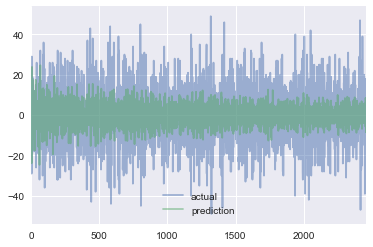

In [184]:
compare[['actual', 'prediction']].plot(alpha=0.5)

# Lasso Regression with One-Hot Encoding

In [125]:
X_train_lassoo = df_train_ohe.iloc[:,0:70]
y_train_lassoo = df_train_ohe.iloc[:,-1]
X_test_lassoo = df_test_ohe.iloc[:,0:70]
y_test_lassoo = df_test_ohe.iloc[:,-1]

In [126]:
train = scaler.fit(X_train_lassoo)
test = scaler.fit(X_test_lassoo)

X_train_lassoo = train.transform(X_train_lassoo)
X_test_lassoo = test.transform(X_test_lassoo)

In [131]:
lassoo = linear_model.Lasso(alpha = 0.5).fit(X_train_lassoo, y_train_lassoo)
y_pred_lassoo = lassoo.predict(X_test_lassoo)

mean_absolute_error(y_test_lassoo, y_pred_lassoo)

9.5759486464615833

# Gradient Boosting Regression

In [185]:
X_train_gbr = df_train.iloc[:,4:15]
y_train_gbr = df_train.iloc[:,-1]
X_test_gbr = df_test.iloc[:,4:15]
y_test_gbr = df_test.iloc[:,-1]

In [186]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              'max_features': [1.0, 0.3, 0.1] 
              }

GBR = GradientBoostingRegressor(n_estimators=3000)

grid_gbr = GridSearchCV(GBR,param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gbr.fit(X_train_gbr, y_train_gbr)

print(grid_gbr.best_score_)
print(grid_gbr.best_params_)
print(grid_gbr.best_estimator_)

y_pred_best_gbr = grid_gbr.best_estimator_.fit(X_train_gbr, y_train_gbr).predict(X_test_gbr)
mean_absolute_error(y_test_gbr, y_pred_best_gbr)

-3.33384277248
{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 17}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=17,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


9.9999964135715196

# Gradient Boosting Regression with One-Hot Encoding

In [239]:
X_train_gbro = df_train_ohe.iloc[:,0:70]
y_train_gbro = df_train_ohe.iloc[:,-1]
X_test_gbro = df_test_ohe.iloc[:,0:70]
y_test_gbro = df_test_ohe.iloc[:,-1]

In [240]:
train = scaler.fit(X_train_gbro)
test = scaler.fit(X_test_gbro)

X_train_gbro = train.transform(X_train_gbro)
X_test_gbro = test.transform(X_test_gbro)

In [243]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              'max_features': [1.0, 0.3, 0.1] 
              }

GBR_o = GradientBoostingRegressor(n_estimators=1000)

grid_gbro = GridSearchCV(GBR,param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gbro.fit(X_train_gbro, y_train_gbro)

print(grid_gbro.best_score_)
print(grid_gbro.best_params_)
print(grid_gbro.best_estimator_)

y_pred_best_gbro = grid_gbro.best_estimator_.fit(X_train_gbro, y_train_gbro).predict(X_test_gbro)
mean_absolute_error(y_test_gbro, y_pred_best_gbro)

KeyboardInterrupt: 

In [210]:
import pickle

In [212]:
GBR_ohe = grid_gbro.best_estimator_.fit(X_train_gbro, y_train_gbro)

filename = 'finalized_model_regression.sav'
pickle.dump(GBR_ohe, open(filename, 'wb'))

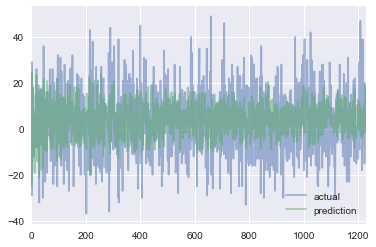

In [191]:
compare = pd.DataFrame()
compare['prediction'] = y_pred_best_gbro
compare['actual'] = y_test_gbro

compare[['actual', 'prediction']].plot(alpha=0.5)

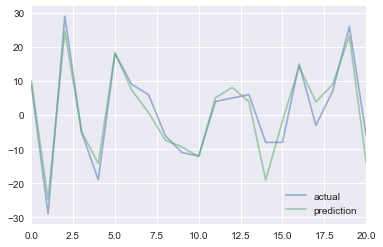

In [193]:
compare = pd.DataFrame()
compare['prediction'] = y_pred_best_gbro[0:21]
compare['actual'] = y_test_gbro[0:21]

compare[['actual', 'prediction']].plot(alpha=0.5)